C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


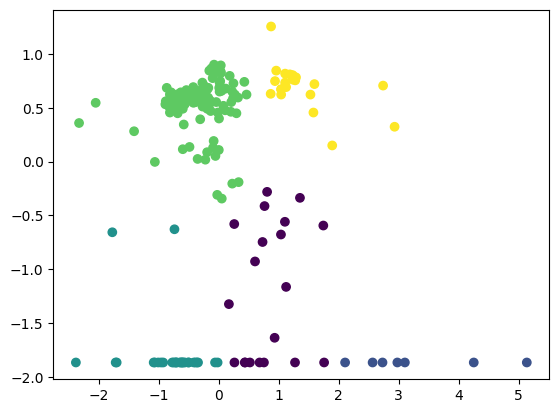

C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1

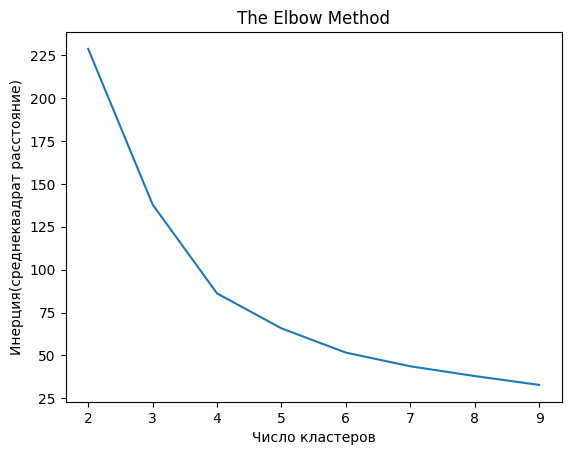

C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1

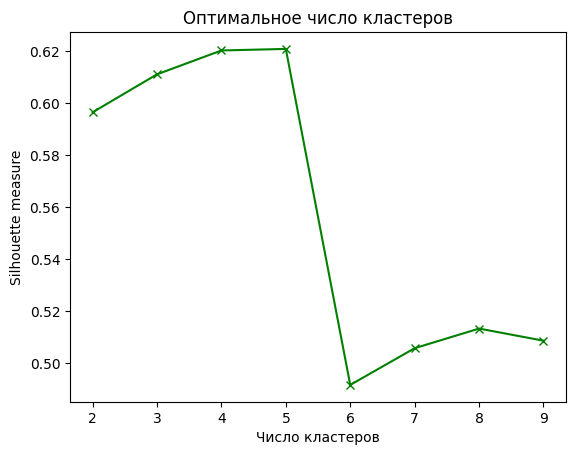

C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Adjusted Rand Index: 0.22072242455495117
6


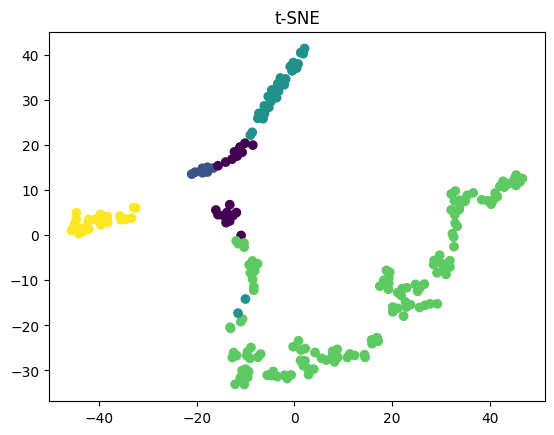

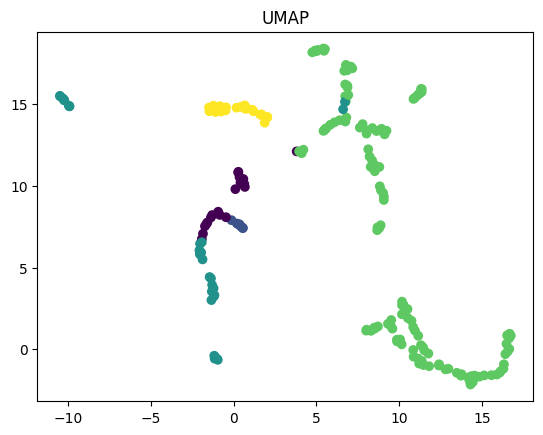

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('glass.csv')
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)

Z = df.iloc[:, [1, 3]].values
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z)

kmeansModel = KMeans(n_clusters=5, init='k-means++')
kmeansModel.fit_predict(Z)

plt.scatter(df.iloc[:, 1], df.iloc[:, 3], c=kmeansModel.labels_, cmap='viridis')
plt.show()


wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit_predict(Z)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция(среднеквадрат расстояние)')
plt.show()

Silhouette_measure = []
K = range(2, 10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit_predict(Z)
    Silhouette_measure.append(silhouette_score(Z, kmeans.labels_))
plt.plot(K, Silhouette_measure, 'bx-', color='green')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette measure')
plt.title('Оптимальное число кластеров')
plt.show()

from sklearn.metrics import adjusted_rand_score

true_labels = df.iloc[:, 10]
cluster_labels = kmeansModel.labels_
ari = adjusted_rand_score(true_labels, cluster_labels)
print('Adjusted Rand Index:', ari)

print(df.iloc[:, 10].nunique())

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, learning_rate=200)
tsne_result = tsne.fit_transform(Z)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeansModel.labels_, cmap='viridis')
plt.title('t-SNE')
plt.show()


import umap

umap_result = umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.3).fit_transform(Z)

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=kmeansModel.labels_, cmap='viridis')
plt.title('UMAP')
plt.show()